Top 5 Companies by ESG Score:


/tmp/ipython-input-2061085546.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Company,Sector,Country,Custom_ESG
16,Power Grid,Utilities,India,80.000000
18,Titan,Consumer,India,78.666667
9,Maruti Suzuki,Automobile,India,74.000000
2,HDFC Bank,Finance,India,73.666667
15,Nestle India,Consumer,India,73.333333


/tmp/ipython-input-2061085546.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Custom_ESG', data=top5, palette='magma')


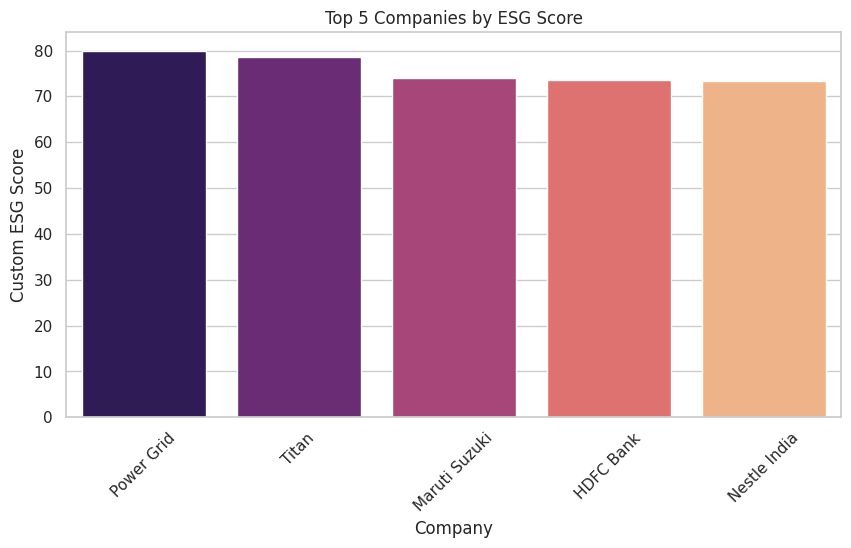

Average Custom ESG by Sector:


,Custom_ESG
Sector,
Utilities,80.000000
Automobile,72.666667
Energy,68.666667
Consumer,68.333333
Finance,66.583333
IT,63.166667
Industrials,62.000000
Telecom,59.000000


/tmp/ipython-input-2061085546.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_avg.index, y=sector_avg.values, palette='viridis')


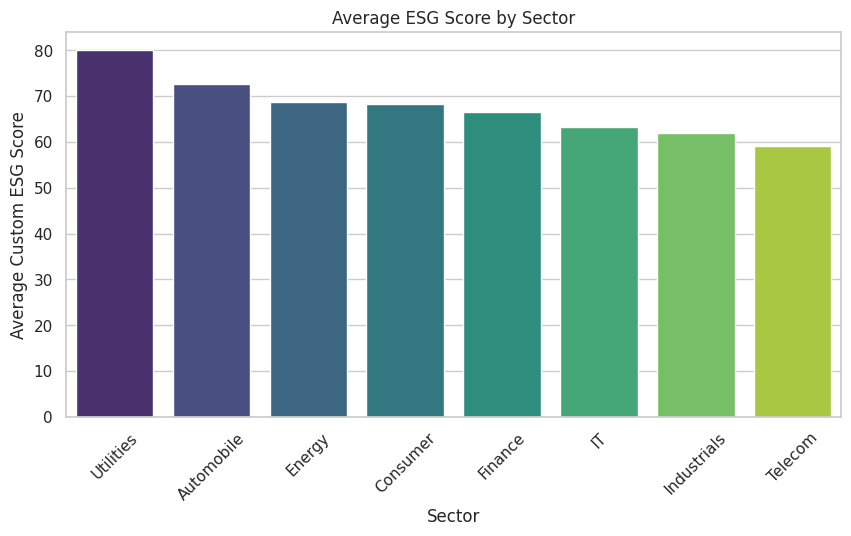

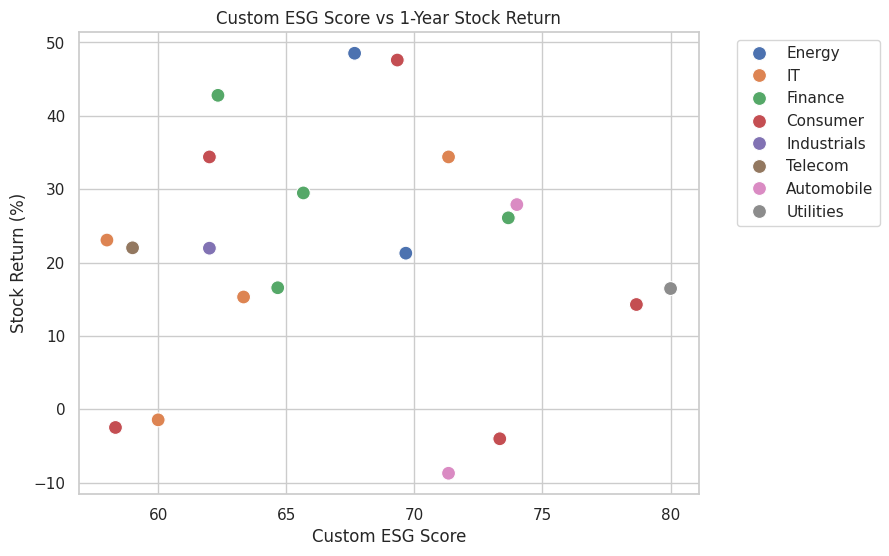

Correlation between Custom ESG Score and 1-Year Stock Return: -0.01


In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create Sample Dataset (20 companies)
data = {
    "Company": [
        "Reliance", "TCS", "HDFC Bank", "Infosys", "ITC",
        "Larsen & Toubro", "Bharti Airtel", "HCL Tech", "Asian Paints", "Maruti Suzuki",
        "ICICI Bank", "Kotak Mahindra", "Mahindra & Mahindra", "Hindustan Unilever",
        "Bajaj Finance", "Nestle India", "Power Grid", "ONGC", "Titan", "Wipro"
    ],
    "Ticker": [
        "RELIANCE", "TCS", "HDFCBANK", "INFY", "ITC",
        "LT", "BHARTIARTL", "HCLTECH", "ASIANPAINT", "MARUTI",
        "ICICIBANK", "KOTAKBANK", "M&M", "HINDUNILVR",
        "BAJFINANCE", "NESTLEIND", "POWERGRID", "ONGC", "TITAN", "WIPRO"
    ],
    "Sector": [
        "Energy", "IT", "Finance", "IT", "Consumer",
        "Industrials", "Telecom", "IT", "Consumer", "Automobile",
        "Finance", "Finance", "Automobile", "Consumer",
        "Finance", "Consumer", "Utilities", "Energy", "Consumer", "IT"
    ],
    "Country": ["India"]*20,
    "E_score": np.random.randint(50, 90, 20).astype(float),
    "S_score": np.random.randint(50, 90, 20).astype(float),
    "G_score": np.random.randint(50, 90, 20).astype(float),
    "Controversies": np.random.randint(0,2,20),
    "Revenue_million_usd": np.random.randint(1000, 50000, 20).astype(float),
    "NetIncome_million_usd": np.random.randint(100, 10000, 20).astype(float),
    "MarketCap_million_usd": np.random.randint(5000, 300000, 20).astype(float),
    "StockReturn_1Y_pct": np.random.uniform(-10, 50, 20)
}

df = pd.DataFrame(data)

# Step 3: Handle Missing Values (if any)
for col in ['E_score','S_score','G_score']:
    df[col].fillna(df[col].mean(), inplace=True)

# Step 4: Calculate Custom ESG Score
df['Custom_ESG'] = df[['E_score','S_score','G_score']].mean(axis=1)

# Step 5: Top 5 Companies by Custom ESG
top5 = df.sort_values(by='Custom_ESG', ascending=False).head(5)
print("Top 5 Companies by ESG Score:")
display(top5[['Company','Sector','Country','Custom_ESG']])

# ---------------------------
# Step 5a: Bar Plot for Top 5 Companies ESG
plt.figure(figsize=(10,5))
sns.barplot(x='Company', y='Custom_ESG', data=top5, palette='magma')
plt.title('Top 5 Companies by ESG Score')
plt.ylabel('Custom ESG Score')
plt.xticks(rotation=45)
plt.show()

# Step 6: Sector-wise ESG Analysis
sector_avg = df.groupby('Sector')['Custom_ESG'].mean().sort_values(ascending=False)
print("Average Custom ESG by Sector:")
display(sector_avg)

plt.figure(figsize=(10,5))
sns.barplot(x=sector_avg.index, y=sector_avg.values, palette='viridis')
plt.title('Average ESG Score by Sector')
plt.ylabel('Average Custom ESG Score')
plt.xticks(rotation=45)
plt.show()

# Step 7: ESG vs 1-Year Stock Return
plt.figure(figsize=(8,6))
sns.scatterplot(x='Custom_ESG', y='StockReturn_1Y_pct', data=df, hue='Sector', s=100)
plt.title('Custom ESG Score vs 1-Year Stock Return')
plt.xlabel('Custom ESG Score')
plt.ylabel('Stock Return (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Optional: Correlation
correlation = df['Custom_ESG'].corr(df['StockReturn_1Y_pct'])
print(f"Correlation between Custom ESG Score and 1-Year Stock Return: {correlation:.2f}")